In [1]:
import networkx as nx
#방향성이 없는 네트워크 생성
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)

In [3]:
#리스트에 안에 있는 노드와 링크를 가져옴
G.add_nodes_from([3,4,5])
G.add_edges_from([(3,4),(3,5)])

In [5]:
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [7]:
G.edges()

EdgeView([(1, 2), (3, 4), (3, 5)])

In [9]:
G.neighbors(3)

In [11]:
list(G.neighbors(3))

[4, 5]

In [17]:
a = []
for i in list(G.neighbors(3)):
    a.append((3,i))

In [19]:
a

[(3, 4), (3, 5)]

In [23]:
D=nx.DiGraph()
D.add_nodes_from([1,2,3,4,5])
D.add_edges_from([(1,2),(3,4),(4,3),(4,5),(5,4)])

In [25]:
D.nodes()

NodeView((1, 2, 3, 4, 5))

In [29]:
# 방향성이 있는 네트워크라서 (3,4)와 (4,3) 구분

In [35]:
D.edges()

OutEdgeView([(1, 2), (3, 4), (4, 3), (4, 5), (5, 4)])

In [37]:
# 노드 2로 들어오는 노드

In [47]:
list(D.predecessors(3))

[4]

In [49]:
# 노드 2에서 나가는 노드

In [53]:
list(D.successors(3))

[4]

In [55]:
# 조밀도(density)출력

In [51]:
nx.density(G)
#최대 10개의 링크가 존재할 수 있는데 3개의 링크 존재

0.3

In [59]:
nx.density(D)
# 방향성이 존재하므로 최대 20개 존재할 수 있는데 5개의 링크 존재

0.25

In [61]:
#노드 1,2,3 포함해서 서브 그래프 작성
nx.subgraph(D,(1,2,3))

In [63]:
#연결선 수 출력
#방향성이 있는 경우 나가고 들어오는 연결선 수 모두 포함
D.degree(3)

2

In [67]:
#노드 4와 5와 연결되있으니 2개
G.degree(3)

2

In [69]:
#링크에 가중치 부여
a=[1,2,3,4,5]
b=[]
for i in a:
    for j in range(i+1,6):
        b.append((i,j))
b

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [73]:
W=nx.Graph()
W.add_nodes_from(a)
W.add_edges_from(b)

In [75]:
weighted_edges = [(c,d,c+d) for c,d in b]
weighted_edges

[(1, 2, 3),
 (1, 3, 4),
 (1, 4, 5),
 (1, 5, 6),
 (2, 3, 5),
 (2, 4, 6),
 (2, 5, 7),
 (3, 4, 7),
 (3, 5, 8),
 (4, 5, 9)]

In [77]:
W.add_weighted_edges_from(weighted_edges)

In [85]:
W.edges(data='weight')

EdgeDataView([(1, 2, 3), (1, 3, 4), (1, 4, 5), (1, 5, 6), (2, 3, 5), (2, 4, 6), (2, 5, 7), (3, 4, 7), (3, 5, 8), (4, 5, 9)])

In [87]:
W.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])

In [89]:
#인접행렬출력
#w는 가중치가 부여돼서 가중치로 인접행렬이 나오는구나
print(nx.adjacency_matrix(W))

  (0, 1)	3
  (0, 2)	4
  (0, 3)	5
  (0, 4)	6
  (1, 0)	3
  (1, 2)	5
  (1, 3)	6
  (1, 4)	7
  (2, 0)	4
  (2, 1)	5
  (2, 3)	7
  (2, 4)	8
  (3, 0)	5
  (3, 1)	6
  (3, 2)	7
  (3, 4)	9
  (4, 0)	6
  (4, 1)	7
  (4, 2)	8
  (4, 3)	9


In [91]:
#G는 가중치가 없어서 링크유무로 (0,1)로 나타내는구나
print(nx.adjacency_matrix(G))

  (0, 1)	1
  (1, 0)	1
  (2, 3)	1
  (2, 4)	1
  (3, 2)	1
  (4, 2)	1


In [107]:
list(D.adjacency())

[(1, {2: {}}), (2, {}), (3, {4: {}}), (4, {3: {}, 5: {}}), (5, {4: {}})]

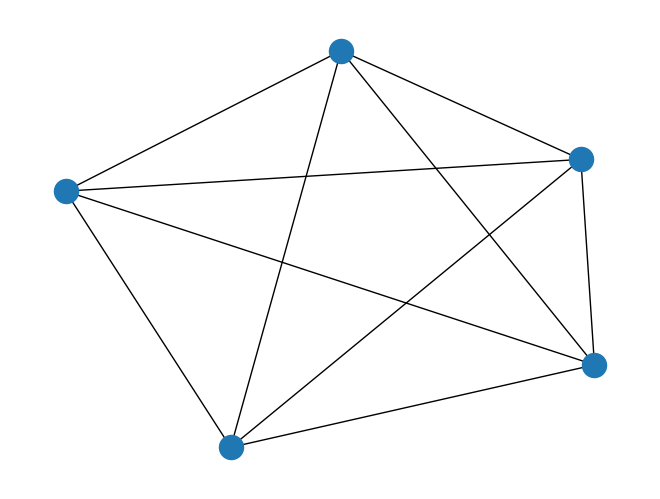

In [109]:
import matplotlib.pyplot as plt
nx.draw(W)

In [113]:
for n,neighbors in G.adjacency():
    for number,link_attributes in neighbors.items():
        print('(%d,%d)'%(n,number),)

(1,2)
(2,1)
(3,4)
(3,5)
(4,3)
(5,3)


In [141]:
for n,neighbors in W.adjacency():
    for number,link_attributes in neighbors.items():
        print(n,number,link_attributes)

1 2 {'weight': 3}
1 3 {'weight': 4}
1 4 {'weight': 5}
1 5 {'weight': 6}
2 1 {'weight': 3}
2 3 {'weight': 5}
2 4 {'weight': 6}
2 5 {'weight': 7}
3 1 {'weight': 4}
3 2 {'weight': 5}
3 4 {'weight': 7}
3 5 {'weight': 8}
4 1 {'weight': 5}
4 2 {'weight': 6}
4 3 {'weight': 7}
4 5 {'weight': 9}
5 1 {'weight': 6}
5 2 {'weight': 7}
5 3 {'weight': 8}
5 4 {'weight': 9}


In [137]:
for n,neighbors in G.adjacency():
    print(n,neighbors)
#neighbors는 연결된 노드와 가중치를 나타내는 dictionary이다.
#number은 연결된 노드를 나타낸다.

1 {2: {}}
2 {1: {}}
3 {4: {}, 5: {}}
4 {3: {}}
5 {3: {}}


In [129]:
for n,neighbors in W.adjacency():
    print(n,neighbors)

1 {2: {'weight': 3}, 3: {'weight': 4}, 4: {'weight': 5}, 5: {'weight': 6}}
2 {1: {'weight': 3}, 3: {'weight': 5}, 4: {'weight': 6}, 5: {'weight': 7}}
3 {1: {'weight': 4}, 2: {'weight': 5}, 4: {'weight': 7}, 5: {'weight': 8}}
4 {1: {'weight': 5}, 2: {'weight': 6}, 3: {'weight': 7}, 5: {'weight': 9}}
5 {1: {'weight': 6}, 2: {'weight': 7}, 3: {'weight': 8}, 4: {'weight': 9}}


In [151]:
import networkx as nx

# 네트워크 생성 및 노드 추가
W = nx.Graph()
W.add_nodes_from([
    (1, {'age': 25}),
    (2, {'age': 30}),
    (3, {'age': 35}),
    (4, {'age': 40})
])

# 엣지 추가
W.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# 수치 속성 이름 정의
node_attribute = 'age'

# 수치 동질성 계산
assortativity_coefficient = nx.numeric_assortativity_coefficient(W, node_attribute)
print("Numeric Assortativity Coefficient:", assortativity_coefficient)

Numeric Assortativity Coefficient: -0.2
